In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
#df.head()
#df.describe()

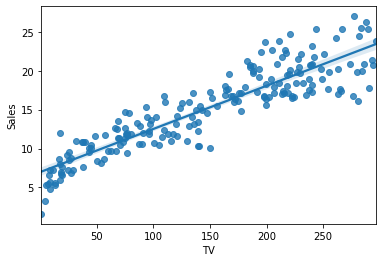

In [4]:
#sns.pairplot(x_vars=["TV","Radio","Newspaper"], y_vars="Sales", data=df)
sns.regplot(x="TV", y="Sales", data=df)
plt.show()

In [43]:
import sklearn
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
#for calculating R^2 and Mean Squareed Error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#for sklear to calculate the same things which we done using statsmodels
from sklearn.linear_model import LinearRegression

In [6]:
X=df["TV"]
y=df["Sales"]

In [7]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=100)

In [8]:
X_train_sm = sm.add_constant(X_train)

In [9]:
lr = sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()

In [10]:
#lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 20 Jul 2021   Prob (F-statistic):           1.52e-52
Time:                        18:51:08   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

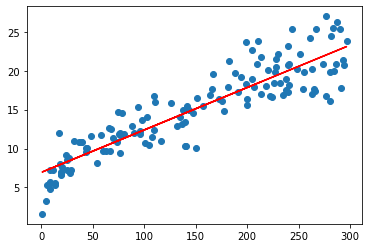

In [64]:
#y=mx + c
# c = 6.9487, m = 0.0545
plt.scatter(X_train, y_train)
plt.plot(X_train, 0.0545*X_train+6.9487, "r")
plt.show()

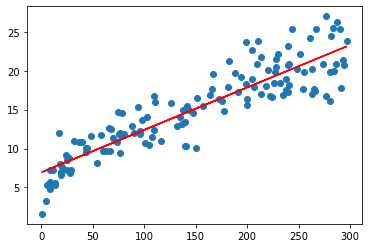

In [20]:
#y=mx + c
# c = 6.9487, m = 0.0545
plt.scatter(X_train, y_train)
y_pred_train = lr_model.predict(X_train_sm)
plt.plot(X_train, y_pred_train, "r")
plt.show()

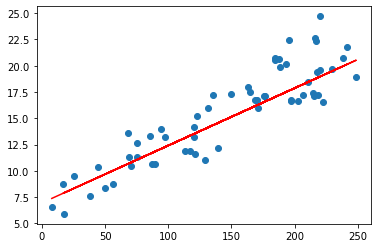

In [21]:
plt.scatter(X_test, y_test)
X_test_sm = sm.add_constant(X_test)
y_pred_test = lr_model.predict(X_test_sm)
plt.plot(X_test, y_pred_test, "r")
plt.show()

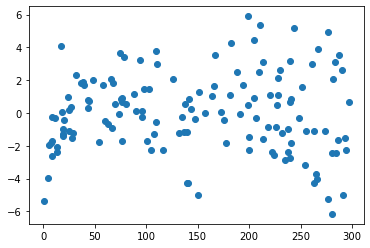

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


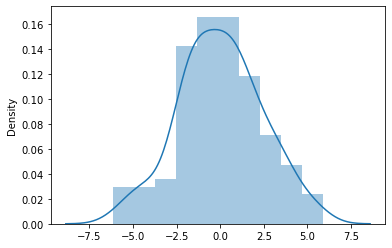

In [29]:
y_train_error = y_train-y_pred_train
plt.scatter(X_train, y_train_error)
plt.show()
sns.distplot(y_train_error)
plt.show()

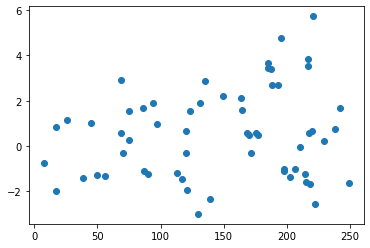

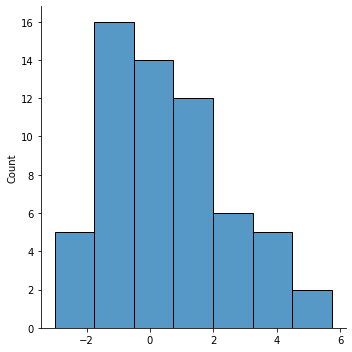

In [32]:
y_test_error = y_test - y_pred_test
plt.scatter(X_test, y_test_error)
plt.show()
sns.displot(y_test_error)
plt.show()

In [41]:
#r2_train = r2_Score()
print(r2_score(y_true=y_train, y_pred=y_pred_train))
print(mean_squared_error(y_true=y_train, y_pred=y_pred_train))

0.8157933136480389
5.752400386486836


In [42]:
print(r2_score(y_true=y_test, y_pred=y_pred_test))
print(mean_squared_error(y_true=y_test, y_pred=y_pred_test))

0.7921031601245658
4.077556371826956


In [47]:
lm = LinearRegression()
X_train_lm = X_train.values.reshape(-1, 1)
lm.fit(X_train_lm, y_train)

LinearRegression()

In [49]:
#?lm
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.9486832000013585


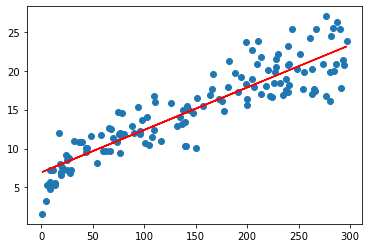

In [62]:
y_train_pred_lm = lm.predict(X_train_lm)
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred_lm, "r")
plt.show()

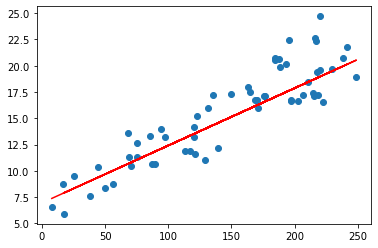

In [63]:
X_test_lm = X_test.values.reshape(-1, 1)
y_test_pred_lm = lm.predict(X_test_lm)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred_lm, "r")
plt.show()